In [1]:
import torch
import torch.nn as nn

In [4]:
INPUT_FEATURES = 2
OUTPUT_NEURONS = 1

In [5]:
activation = nn.Tanh()

In [5]:
# activation = nn.PReLU()

In [6]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(
            INPUT_FEATURES,
            OUTPUT_NEURONS
        )
    
    def forward(self, X_test):
        y_test = activation(self.layer1(X_test))
        return y_test

In [7]:
model = NeuralNetwork()
model

NeuralNetwork(
  (layer1): Linear(in_features=2, out_features=1, bias=True)
)

In [8]:
weight = nn.Parameter(
    torch.tensor([[0.6, -0.2]])
)
bias = nn.Parameter(
    torch.tensor([0.8])
)

In [15]:
# weightとbiasを学習によって、決めないで、指定している

model.layer1.weight = weight
model.layer1.bias = bias

In [10]:
params = model.state_dict()
params

OrderedDict([('layer1.weight', tensor([[ 0.6000, -0.2000]])),
             ('layer1.bias', tensor([0.8000]))])

In [13]:
X_test = torch.tensor([[1.0, 2.0]])
X_test

tensor([[1., 2.]])

In [14]:
y_pred = model(X_test)
y_pred

tensor([[0.7616]], grad_fn=<TanhBackward>)

## visualize

In [17]:
from torchviz import make_dot

In [20]:
dict(model.named_parameters())

{'layer1.weight': Parameter containing:
 tensor([[ 0.6000, -0.2000]], requires_grad=True),
 'layer1.bias': Parameter containing:
 tensor([0.8000], requires_grad=True)}

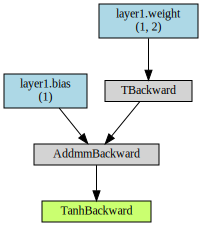

In [18]:
make_dot(y_pred, params=dict(model.named_parameters()))

## 逆伝播

In [36]:
X_train = torch.tensor([1.0], requires_grad=True)

y_train = X_train ** 2
X_train, y_train

(tensor([1.], requires_grad=True), tensor([1.], grad_fn=<PowBackward0>))

In [37]:
# 微分しているだけ
y_train.backward()

In [38]:
X_train.grad

tensor([2.])

## モデル内で逆伝播

In [44]:
# model.layer1.weight.grad = None
# model.layer1.bias.grad = None
model.zero_grad()

In [46]:
y_true = torch.tensor([[1.0]])

In [48]:
criterion = nn.MSELoss()
# predが先に来るのに、すごい違和感を覚える
loss = criterion(y_pred, y_true)
loss

tensor(0.0568, grad_fn=<MseLossBackward>)

In [49]:
loss.backward()

In [53]:
model.layer1.weight.grad, model.layer1.bias.grad

(tensor([[-0.2002, -0.4005]]), tensor([-0.2002]))

In [55]:
# 現時点ではまだweightは更新されていない
model.layer1.weight, model.layer1.bias

(Parameter containing:
 tensor([[ 0.6000, -0.2000]], requires_grad=True),
 Parameter containing:
 tensor([0.8000], requires_grad=True))

In [56]:
torch.__version__

'1.4.0'